# Newton-Raphson Method: Real-Life Applications Assignment

## 1. Introduction to Newton-Raphson Method

The **Newton-Raphson Method** is one of the most powerful and widely used numerical techniques for finding roots of equations. 
### Method Formula:
For finding roots of f(x) = 0:

x_{n+1} = x_n - f(x_n)/f'(x_n)

 WATER PRESSURE ANALYSIS USING NEWTON-RAPHSON METHOD
Given Parameters:
  Atmospheric Pressure (P₀): 101,325 Pa
  Water Density (ρ): 1000 kg/m³
  Gravitational Acceleration (g): 9.81 m/s²
  Target Pressure: 300,000 Pa

Initial guess: h₀ = 5.0 meters
Tolerance: 1e-06
Maximum iterations: 20

Iteration History:
Iter    h (m)        f(h)        Error
----------------------------------------
 1    20.252294    -149625.00    1.53e+01
 2    20.252294        0.00    0.00e+00

 Converged after 2 iterations!

 SOLUTION:
Depth where pressure equals 300,000 Pa: 20.252294 meters
Verification: P = 300000.00 Pa
Error: 0.00e+00 Pa


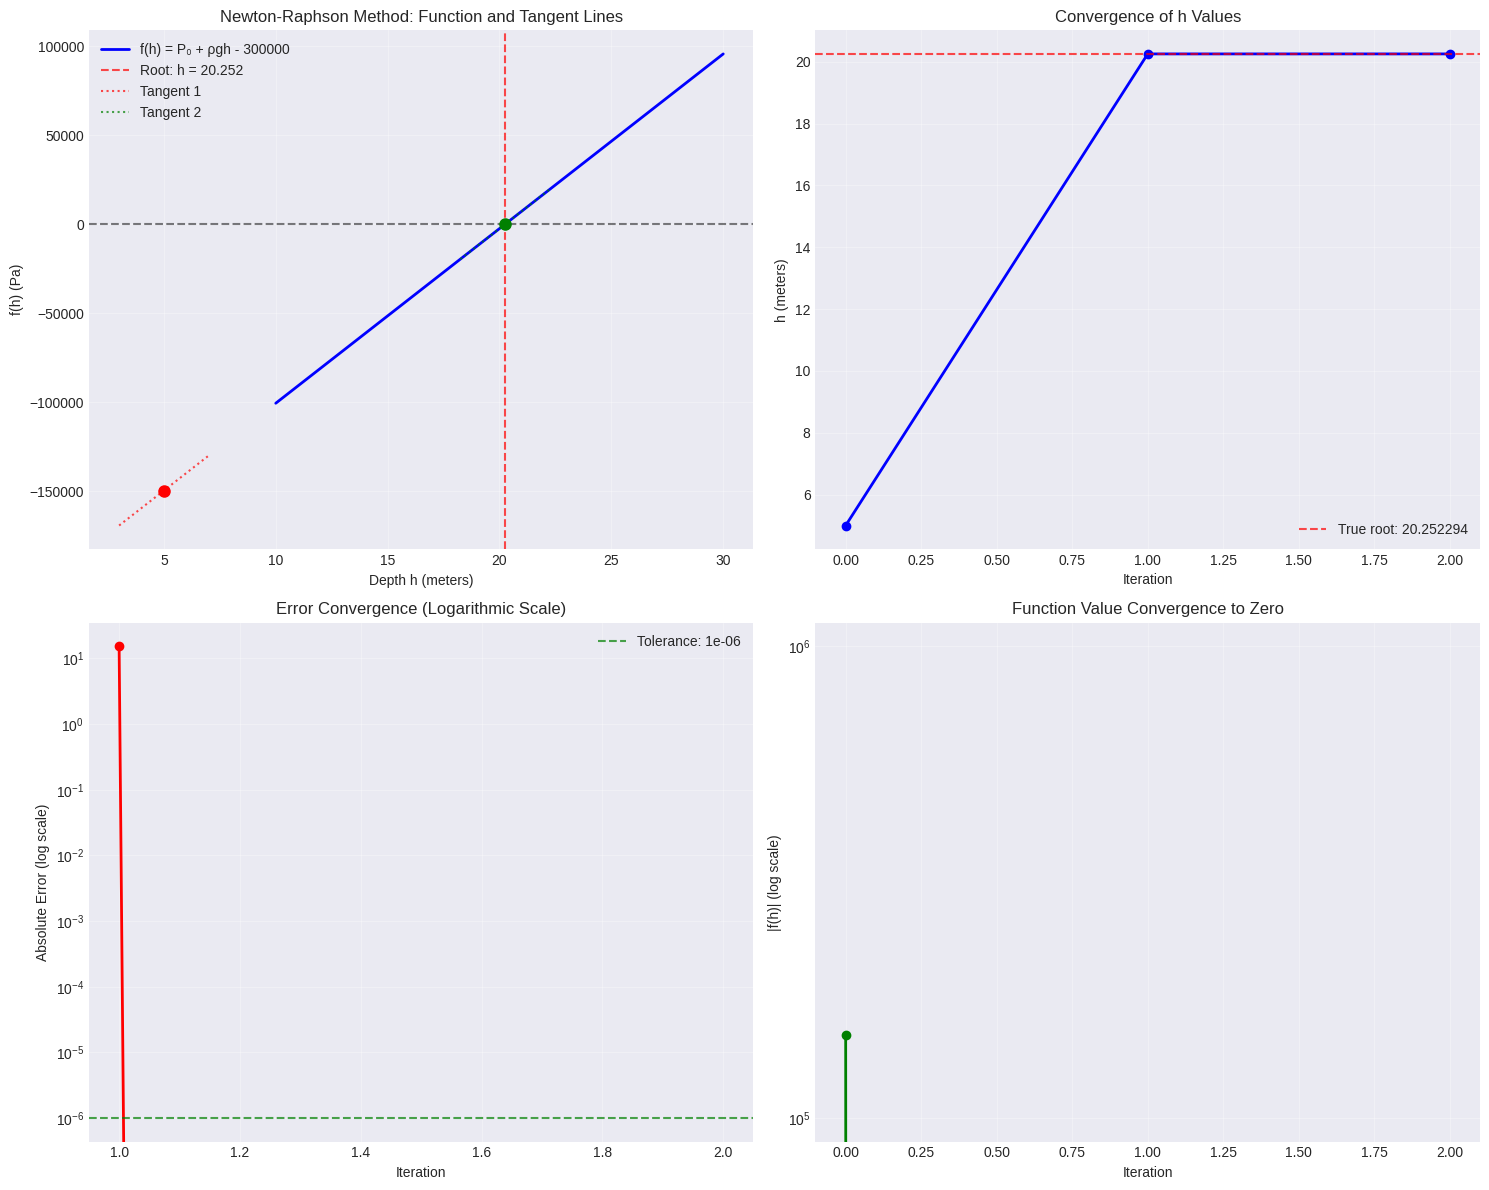


 PHYSICAL INTERPRETATION:
Depth in feet: 66.44 ft
Pressure in atmospheres: 2.96 atm
This is equivalent to diving 66.4 feet underwater!


In [8]:
## 4. Example 1: Water Pressure Problem {#example-1}

# Suppose you drop a small metal ball into water and want to find the depth h (in meters) 
# where the water pressure equals 300,000 Pascals (Pa).

# The pressure under water is given by:
#                           P = P₀ + ρgh
# So we need to solve:
#                       f(h) = P₀ + ρgh - 300000 = 0

import numpy as np
import matplotlib.pyplot as plt

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)

print(" WATER PRESSURE ANALYSIS USING NEWTON-RAPHSON METHOD")
print("=" * 60)

# Constants
P0 = 101325      # Atmospheric pressure (Pa)
rho = 1000       # Density of water (kg/m³)
g = 9.81         # Gravitational acceleration (m/s²)
P_target = 300000  # Desired pressure (Pa)

print(f"Given Parameters:")
print(f"  Atmospheric Pressure (P₀): {P0:,} Pa")
print(f"  Water Density (ρ): {rho} kg/m³")
print(f"  Gravitational Acceleration (g): {g} m/s²")
print(f"  Target Pressure: {P_target:,} Pa")
print()

# Define function and derivative
def f(h):
    """Pressure difference function: f(h) = P₀ + ρgh - P_target"""
    return P0 + rho * g * h - P_target

def f_prime(h):
    """Derivative of pressure function: f'(h) = ρg"""
    return rho * g

# Newton-Raphson iteration with detailed tracking
h = 5.0  # initial guess (meters)
tolerance = 1e-6
max_iter = 20
history = [h]
errors = []
function_values = [f(h)]

print(f"Initial guess: h₀ = {h} meters")
print(f"Tolerance: {tolerance}")
print(f"Maximum iterations: {max_iter}")
print()

print("Iteration History:")
print("Iter    h (m)        f(h)        Error")
print("-" * 40)

for i in range(max_iter):
    f_val = f(h)
    f_prime_val = f_prime(h)
    
    h_new = h - f_val / f_prime_val
    error = abs(h_new - h)
    
    history.append(h_new)
    errors.append(error)
    function_values.append(f(h_new))
    
    print(f"{i+1:2d}    {h_new:8.6f}    {f_val:8.2f}    {error:.2e}")
    
    if error < tolerance:
        print(f"\n Converged after {i+1} iterations!")
        break
    h = h_new

print(f"\n SOLUTION:")
print(f"Depth where pressure equals {P_target:,} Pa: {h_new:.6f} meters")
print(f"Verification: P = {P0 + rho * g * h_new:.2f} Pa")
print(f"Error: {abs(P0 + rho * g * h_new - P_target):.2e} Pa")

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Function and tangent lines
h_plot = np.linspace(10, 30, 1000)
f_plot = [f(h) for h in h_plot]

ax1.plot(h_plot, f_plot, 'b-', linewidth=2, label='f(h) = P₀ + ρgh - 300000')
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax1.axvline(x=h_new, color='r', linestyle='--', alpha=0.7, label=f'Root: h = {h_new:.3f}')

# Draw tangent lines for first few iterations
colors = ['red', 'green', 'orange', 'purple']
for i in range(min(4, len(history)-1)):
    h_i = history[i]
    f_i = f(h_i)
    slope = f_prime(h_i)
    
    # Tangent line points
    h_tangent = np.array([h_i - 2, h_i + 2])
    f_tangent = f_i + slope * (h_tangent - h_i)
    
    ax1.plot(h_tangent, f_tangent, color=colors[i % len(colors)], 
             linestyle=':', alpha=0.7, label=f'Tangent {i+1}')
    ax1.plot(h_i, f_i, 'o', color=colors[i % len(colors)], markersize=8)

ax1.set_xlabel('Depth h (meters)')
ax1.set_ylabel('f(h) (Pa)')
ax1.set_title('Newton-Raphson Method: Function and Tangent Lines')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Convergence history
ax2.plot(range(len(history)), history, 'bo-', linewidth=2, markersize=6)
ax2.axhline(y=h_new, color='r', linestyle='--', alpha=0.7, label=f'True root: {h_new:.6f}')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('h (meters)')
ax2.set_title('Convergence of h Values')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Error analysis
ax3.semilogy(range(1, len(errors)+1), errors, 'ro-', linewidth=2, markersize=6)
ax3.axhline(y=tolerance, color='g', linestyle='--', alpha=0.7, label=f'Tolerance: {tolerance}')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Absolute Error (log scale)')
ax3.set_title('Error Convergence (Logarithmic Scale)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Function values
ax4.semilogy(range(len(function_values)), np.abs(function_values), 'go-', linewidth=2, markersize=6)
ax4.set_xlabel('Iteration')
ax4.set_ylabel('|f(h)| (log scale)')
ax4.set_title('Function Value Convergence to Zero')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Physical interpretation
depth_feet = h_new * 3.28084  # Convert to feet
pressure_atm = (P0 + rho * g * h_new) / 101325  # Convert to atmospheres

print(f"\n PHYSICAL INTERPRETATION:")
print(f"Depth in feet: {depth_feet:.2f} ft")
print(f"Pressure in atmospheres: {pressure_atm:.2f} atm")
print(f"This is equivalent to diving {depth_feet:.1f} feet underwater!")

# Rate of convergence analysis
if len(errors) > 2:
    ratios = [errors[i+1] / (errors[i]**2) for i in range(len(errors)-1) if errors[i] > 1e-15]
    avg_ratio = np.mean(ratios) if ratios else 0
    print(f"\n CONVERGENCE ANALYSIS:")
    print(f"Average quadratic convergence ratio: {avg_ratio:.4f}")
    print("(For quadratic convergence, this should be approximately constant)")